## TAREA 2: IMPORTAR LAS LIBRERIAS Y DATASETS

In [5]:
import pandas as pd
import numpy as np
import os
from PIL import Image # Python Image Library, deal with images
import seaborn as sns
import joblib # Dentro de este modulo, pickle
import cv2
import tensorflow as tf
import IPython.display as display
import keras
import matplotlib.pyplot as plt
import sklearn
# Utilizar import de google.colab si se va a abrir en google colab
# import google.colab as colab

2.4. Cargamos los puntos faciales clave en un df

In [6]:
df = pd.read_csv('data.csv')

df

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,67.180378,35.816373,33.239956,34.921932,59.347973,37.000904,72.667896,37.097600,39.404349,36.589944,...,60.065396,64.397610,73.248393,35.446431,74.014748,48.708626,76.760852,48.559612,77.335618,191 191 191 190 189 185 184 120 54 34 19 24 31...
2136,65.724490,36.301020,25.377551,37.311224,58.530612,37.739796,74.448980,37.525510,33.551020,38.107143,...,62.472789,66.928121,79.229046,28.015377,81.151722,48.771976,81.816774,49.287271,82.871156,19 19 19 18 13 7 3 4 3 1 3 9 11 12 12 13 10 9 ...
2137,68.430866,38.651975,28.895857,37.617027,61.659350,40.100902,75.586792,40.219182,37.665118,39.087245,...,63.289576,68.864397,77.495823,22.013981,77.368995,49.180628,79.043130,47.176739,89.544522,31 40 47 31 54 58 63 100 86 80 82 75 79 86 90 ...
2138,64.152180,30.691592,27.000898,40.868082,56.505624,34.126963,73.436776,28.556335,34.746122,40.506939,...,59.735799,73.730743,70.273886,38.777143,80.684286,58.042857,79.301429,58.611086,80.355543,7 1 5 1 3 20 12 0 5 8 6 18 13 9 8 12 12 11 4 8...


2.6. Obtenemos información relevante del dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

2.7. Comprobamos si hay valores nulos en el dataset

In [8]:
df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

2.8. Composición del df

In [9]:
df.shape

(2140, 31)

2.9. Dado que los valores para la imagen se dan como cadenas separadas por espacios, separamos los
valores usando ' ' como separador.
Luego convertimos esto en una matriz numérica usando np.fromstring y convierta la matriz 1D obtenida
en una matriz 2D de forma (96, 96)

In [10]:
# Supongamos que 'df' es tu DataFrame que contiene los valores de la imagen en la columna 'imagen'

# Extrae los valores de la columna 'imagen' como una lista de cadenas
imagen_strings = df['Image'].tolist()

# Une las cadenas de la lista en una sola cadena separada por espacios
imagen_str = ' '.join(imagen_strings)

# Convierte la cadena en una matriz 1D de números
matriz_1d = np.fromstring(imagen_str, sep=' ')

# Convierte la matriz 1D en una matriz 2D de forma (96, 96)
# Hace falta indicar el número de elementos que contiene, 2140 rows - imagenes
matriz_2d = np.reshape(matriz_1d, (2140, 96, 96))


In [ ]:
matriz_1d

array([238., 236., 237., ..., 125., 124., 119.])

In [ ]:
matriz_2d

array([[[238., 236., 237., ..., 250., 250., 250.],
        [235., 238., 236., ..., 249., 250., 251.],
        [237., 236., 237., ..., 251., 251., 250.],
        ...,
        [186., 183., 181., ...,  52.,  57.,  60.],
        [189., 188., 207., ...,  61.,  69.,  78.],
        [191., 184., 184., ...,  70.,  75.,  90.]],

       [[219., 215., 204., ...,  92.,  88.,  84.],
        [222., 219., 220., ...,  92.,  88.,  86.],
        [231., 224., 212., ...,  77.,  80.,  84.],
        ...,
        [  1.,   1.,   1., ...,   1.,   1.,   1.],
        [  1.,   1.,   1., ...,   1.,   1.,   1.],
        [  1.,   1.,   1., ...,   1.,   1.,   1.]],

       [[144., 142., 159., ..., 208., 207., 207.],
        [143., 142., 161., ..., 208., 208., 207.],
        [143., 140., 160., ..., 209., 209., 207.],
        ...,
        [ 66.,  70.,  69., ...,  81., 134., 194.],
        [ 65.,  69.,  71., ...,  75.,  83., 109.],
        [ 65.,  68.,  70., ...,  78.,  78.,  77.]],

       ...,

       [[ 31.,  40.,  47

In [ ]:
tamano_imagen = matriz_2d.shape[1:]
cantidad_imagenes = matriz_2d.shape[0]
print("Tamaño de las imagenes: {}x{}".format(*tamano_imagen))
print("Cantidad de imagenes: {}".format(cantidad_imagenes))

Tamaño de las imagenes: 96x96
Cantidad de imagenes: 2140


2.12. MINI RETO #1: Obtenga los valores promedio, mínimo y máximo para right_eye_center_x.

In [ ]:
df.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,...,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,66.221549,36.842274,29.640269,37.063815,59.272128,37.856014,73.412473,37.640110,36.603107,37.920852,...,47.952141,57.253926,63.419076,75.887660,32.967365,76.134065,48.081325,72.681125,48.149654,82.630412
std,2.087683,2.294027,2.051575,2.234334,2.005631,2.034500,2.701639,2.684162,1.822784,2.009505,...,3.276053,4.528635,3.650131,4.438565,3.595103,4.259514,2.723274,5.108675,3.032389,4.813557
min,47.835757,23.832996,18.922611,24.773072,41.779381,27.190098,52.947144,26.250023,24.112624,26.250023,...,24.472590,41.558400,43.869480,57.023258,9.778137,56.690208,32.260312,56.719043,33.047605,57.232296
25%,65.046300,35.468842,28.472224,35.818377,58.113054,36.607950,71.741978,36.102409,35.495730,36.766783,...,46.495330,54.466000,61.341291,72.874263,30.879288,73.280038,46.580004,69.271669,46.492000,79.417480
50%,66.129065,36.913319,29.655440,37.048085,59.327154,37.845220,73.240045,37.624207,36.620735,37.920336,...,47.900511,57.638582,63.199057,75.682465,33.034022,75.941985,47.939031,72.395978,47.980854,82.388899
75%,67.332093,38.286438,30.858673,38.333884,60.521492,39.195431,74.978684,39.308331,37.665280,39.143921,...,49.260657,60.303524,65.302398,78.774969,35.063575,78.884031,49.290000,75.840286,49.551936,85.697976
max,78.013082,46.132421,42.495172,45.980981,69.023030,47.190316,87.032252,49.653825,47.293746,44.887301,...,65.279654,75.992731,84.767123,94.673637,50.973348,93.443176,61.804506,93.916338,62.438095,95.808983


## TAREA #3: VISUALIZACIÓN DE IMÁGENES

3.1. Representamos una imagen aleatoria del conjunto de datos junto con puntos clave faciales

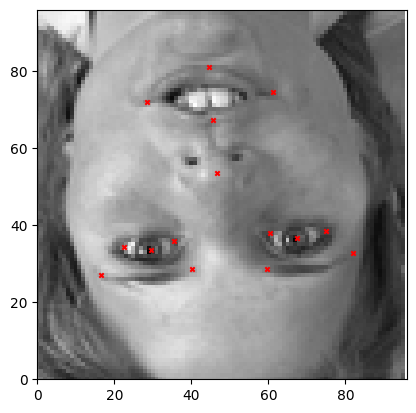

In [ ]:
# Obtén una imagen aleatoria y las coordenadas correspondientes
indice_aleatorio = np.random.randint(len(df))  # Obtén un índice aleatorio dentro del rango de filas del DataFrame
imagen_str = df.loc[indice_aleatorio, 'Image']  # Obtén la cadena de la imagen correspondiente al índice aleatorio

# Selecciona las columnas pares de las coordenadas x
coordenadas_x = df.loc[indice_aleatorio, [col for idx, col in enumerate(df.columns) if idx % 2 == 0 and col != 'Image']]

# Selecciona las columnas impares de las coordenadas y
coordenadas_y = df.loc[indice_aleatorio, [col for idx, col in enumerate(df.columns) if idx % 2 != 0]]

# Convierte la cadena de la imagen en una matriz 2D de forma (96, 96)
imagen_matriz = np.fromstring(imagen_str, sep=' ').reshape(96, 96)

# Muestra la imagen y los puntos clave faciales utilizando plt.imshow
plt.imshow(imagen_matriz, cmap='gray')

# Dibuja los puntos clave faciales en la imagen
plt.scatter(coordenadas_x, coordenadas_y, c='r', marker='x', s=10)

# Configura los límites de los ejes
plt.xlim(96, 0)
plt.ylim(96, 0)
# plt.xlim(0, 96)
# plt.ylim(0, 96)

# Muestra la imagen con los puntos clave faciales
plt.show()

3.2. Veamos más imágenes en formato matricial

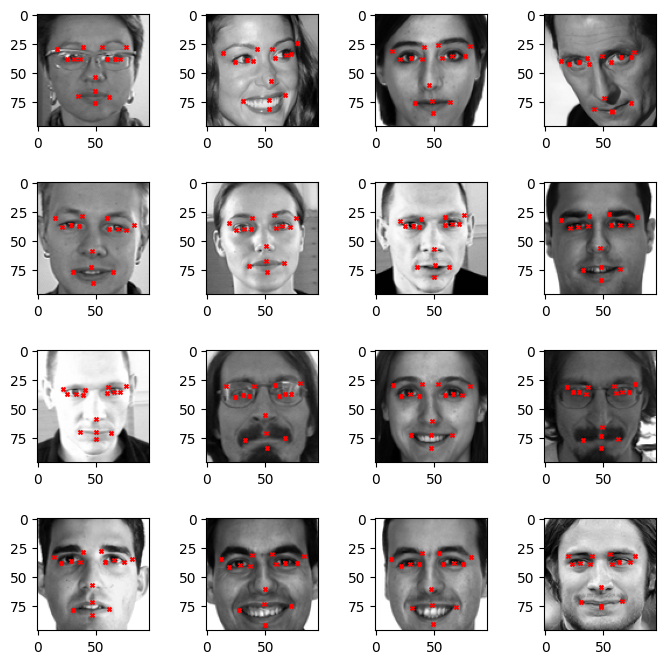

In [ ]:
# Define el número de imágenes que deseas mostrar
# Hay que tener en cuenta que la matriz de imagenes será cuadrada (SOLO num pares)
num_imagenes = 16 #Introducir el número de imagenes que queremos imprimir en pantalla

# Crea una matriz de subfiguras
fig, axes = plt.subplots(nrows=int(num_imagenes**0.5), ncols=int(num_imagenes**0.5), figsize=(8, 8))

# Genera índices aleatorios únicos para seleccionar las imágenes
indices_aleatorios = np.random.choice(len(df), size=num_imagenes, replace=False)

# Itera sobre las subfiguras y los índices aleatorios para mostrar las imágenes
for i, ax in enumerate(axes.flat):
    indice = indices_aleatorios[i]
    imagen_str = df.loc[indice, 'Image']
    coordenadas_x = df.loc[indice, [col for idx, col in enumerate(df.columns) if idx % 2 == 0 and col != 'Image']]
    coordenadas_y = df.loc[indice, [col for idx, col in enumerate(df.columns) if idx % 2 != 0]]

    imagen_matriz = np.fromstring(imagen_str, sep=' ').reshape(96, 96)
    ax.imshow(imagen_matriz, cmap='gray')
    ax.scatter(coordenadas_x, coordenadas_y, c='r', marker='x', s=8)
    ax.axis('on')  # Activa los ejes


# Ajusta los espacios entre las imágenes en los ejes
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Muestra las imágenes en formato matricial
plt.show()


MINI RETO #2:
- Realiza una verificación adicional en los datos visualizando aleatoriamente 64 nuevas imágenes
junto con sus puntos clave correspondientes

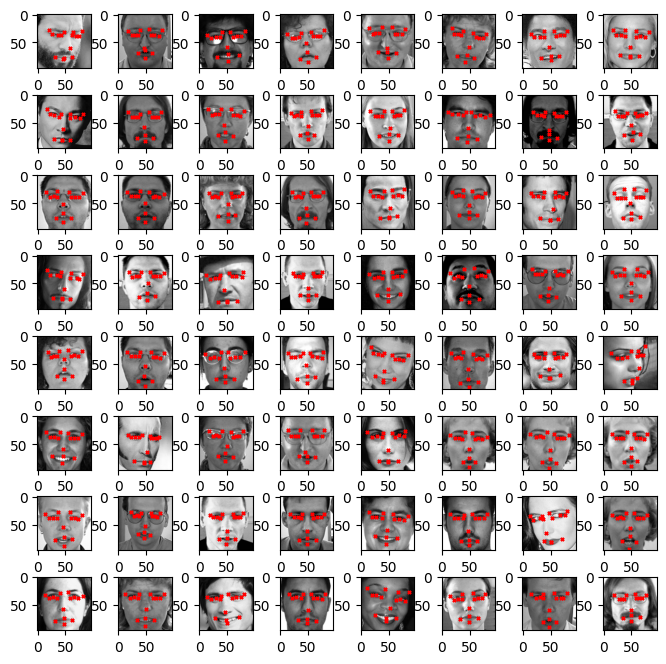

In [ ]:
# Define el número de imágenes que deseas mostrar
# Hay que tener en cuenta que la matriz de imagenes será cuadrada (SOLO num pares)
num_imagenes = 64 #Introducir el número de imagenes que queremos imprimir en pantalla

# Crea una matriz de subfiguras
fig, axes = plt.subplots(nrows=int(num_imagenes**0.5), ncols=int(num_imagenes**0.5), figsize=(8, 8))

# Genera índices aleatorios únicos para seleccionar las imágenes
indices_aleatorios = np.random.choice(len(df), size=num_imagenes, replace=False)

# Itera sobre las subfiguras y los índices aleatorios para mostrar las imágenes
for i, ax in enumerate(axes.flat):
    indice = indices_aleatorios[i]
    imagen_str = df.loc[indice, 'Image']
    coordenadas_x = df.loc[indice, [col for idx, col in enumerate(df.columns) if idx % 2 == 0 and col != 'Image']]
    coordenadas_y = df.loc[indice, [col for idx, col in enumerate(df.columns) if idx % 2 != 0]]

    imagen_matriz = np.fromstring(imagen_str, sep=' ').reshape(96, 96)
    ax.imshow(imagen_matriz, cmap='gray')
    ax.scatter(coordenadas_x, coordenadas_y, c='r', marker='x', s=5)
    ax.axis('on')  # Activa los ejes


# Ajusta los espacios entre las imágenes en los ejes
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Muestra las imágenes en formato matricial
plt.show()

## TAREA #4: AUMENTACIÓN DE LAS IMÁGENES
Aumentamos el numero de imagenes

4.1. Creamos una copia del dataframe



In [ ]:
df_aumentado = df.copy()

4.2. Obtenemos el nombre de las columnas del dataframe

In [ ]:
df_aumentado.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

4.3. Horizontal Flip - Damos la vuelta a las imágenes entorno al eje y

Dado que estamos volteando horizontalmente, los valores de la coordenada y serían los mismos
Solo cambiarían los valores de la coordenada x, todo lo que tenemos que hacer es restar nuestros
valores iniciales de la coordenada x del ancho de la imagen (96)

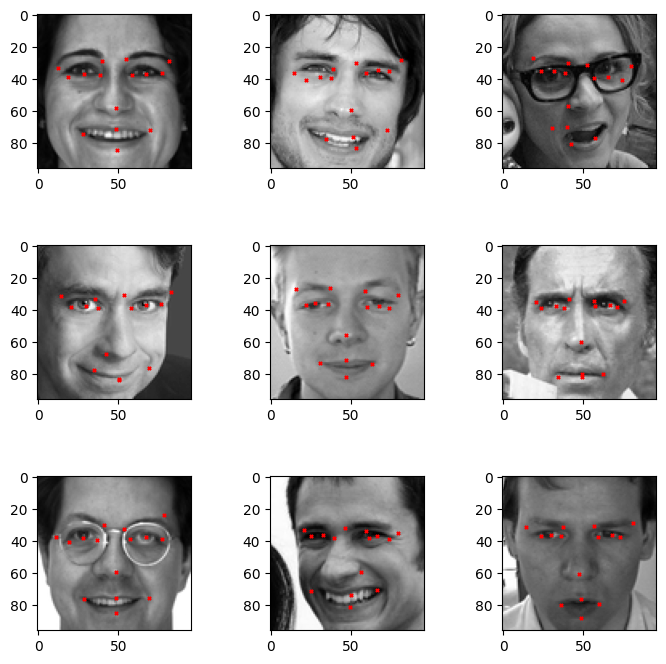

In [ ]:
# Define el número de imágenes que deseas mostrar
# Hay que tener en cuenta que la matriz de imagenes será cuadrada (SOLO num pares)
num_imagenes = 12 #Introducir el número de imagenes que queremos imprimir en pantalla

# Crea una matriz de subfiguras
fig, axes = plt.subplots(nrows=int(num_imagenes**0.5), ncols=int(num_imagenes**0.5), figsize=(8, 8))


# Genera índices aleatorios únicos para seleccionar las imágenes
indices_aleatorios = np.random.choice(len(df), size=num_imagenes, replace=False)

# Itera sobre las subfiguras y los índices aleatorios para mostrar las imágenes
for i, ax in enumerate(axes.flat):
    indice = indices_aleatorios[i]
    imagen_str = df.loc[indice, 'Image']
    coordenadas_x = df.loc[indice, [col for idx, col in enumerate(df.columns) if idx % 2 == 0 and col != 'Image']]
    coordenadas_y = df.loc[indice, [col for idx, col in enumerate(df.columns) if idx % 2 != 0]]

    imagen_matriz = np.fromstring(imagen_str, sep=' ').reshape(96, 96)
    # Voltear la imagen horizontalmente
    imagen_volteada = np.fliplr(imagen_matriz)

    ax.imshow(imagen_volteada, cmap='gray')
    ax.scatter(coordenadas_x, coordenadas_y, c='r', marker='x', s=5)
    ax.axis('on')  # Activa los ejes

# Ajusta los espacios entre las imágenes en los ejes
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Muestra las imágenes en formato matricial
plt.show()

4.5. Mostramos la imagen original

4.6. Mostramos la imagen girada horizontalmente

4.7. Concatenamos el dataset original con el dataframe aumentado

In [ ]:
# Concatenar los dos DataFrames
df_concatenado = pd.concat([df, df_aumentado])
df_concatenado.shape

4.8. Aumentar aleatoriamente el brillo de las imágenes

4.9. Mostramos la imagen con el brillo aumentado

### MINI RETO #3:
- Aumenta las imágenes volteándolas verticalmente (Sugerencia: voltea a lo largo del eje x y ten en
cuenta que si lo hacemos a lo largo del eje x, las coordenadas x no cambiarán)

### MINI RETO #4:
- Haz una comprobación adicional y visualiza las imágenes.